## Predictive modeling

#### Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import random #Faker
from sklearn.ensemble import RandomForestRegressor 

In [28]:
# Libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


#### Generating Random Dataset

In [4]:
location_id = [i for i in range(1, 2001)]
soil_moisture = [random.randint(22, 60) for i in range(2000)]
temperature = [random.randint(30, 40) for i in range(2000)]
carbon_dioxide_levels = [random.uniform(60, 100) for i in range(2000)]
carbon_sequestration_rate = [random.choice([0, 1]) for i in range(2000)]

In [6]:
data = {"location_id": location_id, "soil_moisture": soil_moisture, "temperature": temperature, "carbon_dioxide_levels": carbon_dioxide_levels,
        "carbon_sequestration_rate": carbon_sequestration_rate}

In [7]:
df = pd.DataFrame(data)
df = df.sample(frac=1).reset_index(drop=True)  # shuffle the data

In [8]:
df.to_csv("C:/Users/USER/Desktop/Data Science/data.csv", index=False)  # save the data to a csv file

In [10]:
# Load data  
data = pd.read_csv('data.csv') 

In [12]:
data.head()

,location_id,soil_moisture,temperature,carbon_dioxide_levels,carbon_sequestration_rate
0,1328,33,34,65.600784,0
1,1046,46,40,74.922527,1
2,1301,22,32,77.748347,0
3,168,25,36,97.701226,0
4,572,50,35,74.095670,0


In [13]:
data.tail()

,location_id,soil_moisture,temperature,carbon_dioxide_levels,carbon_sequestration_rate
1995,1636,52,32,79.906562,0
1996,1885,56,38,94.861423,0
1997,1174,51,30,85.438533,1
1998,1111,23,35,71.968219,1
1999,1826,57,30,66.985341,0


In [15]:
data.shape

(2000, 5)

In [16]:
data.dtypes

location_id                    int64
soil_moisture                  int64
temperature                    int64
carbon_dioxide_levels        float64
carbon_sequestration_rate      int64
dtype: object

In [21]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
location_id,2000.0,1000.500000,577.494589,1.000000,500.750000,1000.500000,1500.250000,2000.000000
soil_moisture,2000.0,40.815000,11.188716,22.000000,31.000000,41.000000,50.000000,60.000000
temperature,2000.0,34.947000,3.210817,30.000000,32.000000,35.000000,38.000000,40.000000
carbon_dioxide_levels,2000.0,79.997898,11.773120,60.052626,69.873565,79.954665,90.434562,99.988438
carbon_sequestration_rate,2000.0,0.494500,0.500095,0.000000,0.000000,0.000000,1.000000,1.000000


In [23]:
data.isnull().sum()

location_id                  0
soil_moisture                0
temperature                  0
carbon_dioxide_levels        0
carbon_sequestration_rate    0
dtype: int64

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_id                2000 non-null   int64  
 1   soil_moisture              2000 non-null   int64  
 2   temperature                2000 non-null   int64  
 3   carbon_dioxide_levels      2000 non-null   float64
 4   carbon_sequestration_rate  2000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 78.3 KB


In [25]:
data.duplicated().sum()

0

In [26]:
data.nunique()

location_id                  2000
soil_moisture                  39
temperature                    11
carbon_dioxide_levels        2000
carbon_sequestration_rate       2
dtype: int64

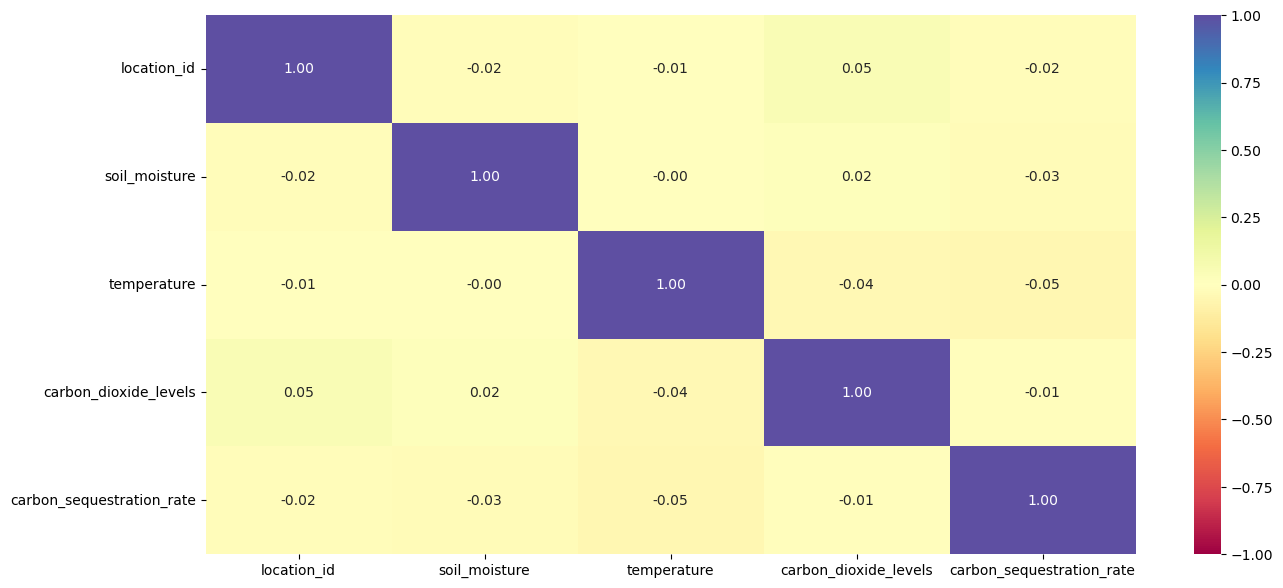

In [29]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [30]:
# Split data into input features (X) and target variable (y) 
X = data[['soil_moisture', 'temperature', 'carbon_dioxide_levels']] 
y = data['carbon_sequestration_rate'] 

In [31]:
# Train a random forest regressor to predict carbon sequestration rate based on input features 
model = RandomForestRegressor() 
model.fit(X, y) 

RandomForestRegressor()

In [ ]:
# Use the trained model to make predictions on new data 
new_data = pd.read_csv('new_project.csv') 
X_new = new_data[['soil_moisture', 'temperature', 'carbon_dioxide_levels']] 
predictions = model.predict(X_new)